In [1]:
import numpy as np
import pandas as pd

In [2]:
# Linear
class phi_1_1:
    def __init__(self):
        pass

    def compute(self, t):
        return (1 - t) / 2

    def compute_2(self, t):
        return -1 / 2


class phi_1_2:
    def __init__(self):
        pass

    def compute(self, t):
        return (1 + t) / 2

    def compute_2(self, t):
        return 1 / 2


# Quadrática
class phi_2_1:
    def __init__(self):
        pass

    def compute(self, t):
        return (t - 1) * t / 2

    def compute_2(self, t):
        return t - (1 / 2)


class phi_2_2:
    def __init__(self):
        pass

    def compute(self, t):
        return (t + 1) * (1 - t)

    def compute_2(self, t):
        return -2 * t


class phi_2_3:
    def __init__(self):
        pass

    def compute(self, t):
        return (t + 1) * t / 2

    def compute_2(self, t):
        return t + (1 / 2)


# Cúbica
class phi_3_1:
    def __init__(self):
        pass

    def compute(self, t):
        return (-9 / 16) * (t + 1 / 3) * (t - 1 / 3) * (t - 1)

    def compute_2(self, t):
        return (-27*(t**2) + 18*t +1)/16


class phi_3_2:
    def __init__(self):
        pass

    def compute(self, t):
        return (27 / 16) * (t + 1) * (t - 1 / 3) * (t - 1)

    def compute_2(self, t):
        return (9*(t**2) -2*t -3)*(9/16)


class phi_3_3:
    def __init__(self):
        pass

    def compute(self, t):
        return (-27 / 16) * (t + 1) * (t + 1 / 3) * (t - 1)

    def compute_2(self, t):
        return (9*(t**2) +2*t -3)*(-9/16)


class phi_3_4:
    def __init__(self):
        pass

    def compute(self, t):
        return (9 / 16) * (t + 1) * (t + 1 / 3) * (t - 1 / 3)

    def compute_2(self, t):
        return (27*(t**2) + 18*t -1)/16


# Quaternária
class phi_4_1:
    def __init__(self):
        pass

    def compute(self, t):
        return (2 / 3) * (t + 1 / 2) * t * (t - 1 / 2) * (t - 1)

    def compute_2(self, t):
        return (16*(t**3) - 12*(t**2) -2*t +1)/6


class phi_4_2:
    def __init__(self):
        pass

    def compute(self, t):
        return (-8 / 3) * (t + 1) * t * (t - 1 / 2) * (t - 1)

    def compute_2(self, t):
        return (8*(t**3) - 3*(t**2) -4*t +1)*(-4/3)


class phi_4_3:
    def __init__(self):
        pass

    def compute(self, t):
        return 4 * (t + 1) * (t + 1 / 2) * (t - 1 / 2) * (t - 1)

    def compute_2(self, t):
        return (2*t)*(8*(t**2) - 5)


class phi_4_4:
    def __init__(self):
        pass

    def compute(self, t):
        return (-8 / 3) * (t + 1) * (t + 1 / 2) * t * (t - 1)

    def compute_2(self, t):
        return (8*(t**3) + 3*(t**2) -4*t -1)*(-4/3)


class phi_4_5:
    def __init__(self):
        pass

    def compute(self, t):
        return (2 / 3) * (t + 1) * (t + 1 / 2) * t * (t - 1 / 2)

    def compute_2(self, t):
        return (16*(t**3) + 12*(t**2) -2*t -1)/6

In [3]:
def func_base_init(k):
    dict_phi = {}
    if k==1:
        dict_phi[1] = phi_1_1()
        dict_phi[2] = phi_1_2()

    elif k==2:
        dict_phi[1] = phi_2_1()
        dict_phi[2] = phi_2_2()
        dict_phi[3] = phi_2_3()

    elif k==3:
        dict_phi[1] = phi_3_1()
        dict_phi[2] = phi_3_2()
        dict_phi[3] = phi_3_3()
        dict_phi[4] = phi_3_4()

    elif k==4:
        dict_phi[1] = phi_4_1()
        dict_phi[2] = phi_4_2()
        dict_phi[3] = phi_4_3()
        dict_phi[4] = phi_4_4()
        dict_phi[5] = phi_4_5()

    else:
        print("Grau de polinômio não implementado")
        return
    
    return dict_phi


In [16]:
class quadratura:
    def __init__(self, k, h) -> None:
        w = np.zeros(k + 1)
        t_GA = np.zeros(k + 1)
        self.h = h
        self.k = k

        if k == 1:
            w[0] = 1
            w[1] = 1
            t_GA[0] = -1 / np.sqrt(3)
            t_GA[1] = 1 / np.sqrt(3)

        if k == 2:
            w[0] = 5 / 9
            w[1] = 8 / 9
            w[2] = 5 / 9
            t_GA[0] = -np.sqrt(3 / 5)
            t_GA[1] = 0
            t_GA[2] = np.sqrt(3 / 5)

        if k == 3:
            w[0] = (18 - np.sqrt(30)) / 36
            w[1] = (18 + np.sqrt(30)) / 36
            w[2] = (18 + np.sqrt(30)) / 36
            w[3] = (18 - np.sqrt(30)) / 36
            t_GA[0] = -np.sqrt(3 / 7 + (2 / 7) * np.sqrt(6 / 5))
            t_GA[1] = -np.sqrt(3 / 7 - (2 / 7) * np.sqrt(6 / 5))
            t_GA[2] = np.sqrt(3 / 7 - (2 / 7) * np.sqrt(6 / 5))
            t_GA[3] = np.sqrt(3 / 7 + (2 / 7) * np.sqrt(6 / 5))

        if k == 4:
            w[0] = (322 - 13 * np.sqrt(70)) / 900
            w[1] = (322 + 13 * np.sqrt(70)) / 900
            w[2] = 128 / 225
            w[3] = (322 + 13 * np.sqrt(70)) / 900
            w[4] = (322 - 13 * np.sqrt(70)) / 900
            t_GA[0] = -(1 / 3) * np.sqrt(5 + 2 * np.sqrt(10 / 7))
            t_GA[1] = -(1 / 3) * np.sqrt(5 - 2 * np.sqrt(10 / 7))
            t_GA[2] = 0
            t_GA[3] = (1 / 3) * np.sqrt(5 - 2 * np.sqrt(10 / 7))
            t_GA[4] = (1 / 3) * np.sqrt(5 + 2 * np.sqrt(10 / 7))

        self.w = w
        self.t_GA = t_GA

    def compute_m(self, j, phi1, phi2):
        poli_sum = 0

        for w, t in zip(self.w, self.t_GA):
            poli_sum += (
                w * j.compute(t) * phi1.compute(t) * phi2.compute(t) * (self.h / 2)
            )

        return poli_sum

    def compute_k(self, k, phi1, phi2):
        poli_sum = 0

        for w, t in zip(self.w, self.t_GA):
            poli_sum += (
                w * k.compute(t) * phi1.compute_2(t) * phi2.compute_2(t) * 2 / self.h
            )

        return poli_sum

    def compute_g(self, g, phi2):
        poli_sum = 0

        for w, t in zip(self.w, self.t_GA):
            poli_sum += w * g.compute(t) * phi2.compute(t) * (self.h / 2)

        return poli_sum

    def compute_l2(self, g, shg, alpha, xl, index):
        poli_sum = 0
        nen = self.k + 1

        for w, t in zip(self.w, self.t_GA):
            uh = 0
            xx = 0

            for i in range(nen):
                phi = shg[i + 1]
                uh += phi.compute(t) * alpha[index + i][0]
                xx += phi.compute(t) * xl[index + i]

            poli_sum += ((g.compute_real(xx) - uh) ** 2) * w * (self.h / 2)

        return poli_sum

    def compute_dif_l2(self, g, shg, alpha, xl, index):
        poli_sum = 0
        nen = self.k + 1

        for w, t in zip(self.w, self.t_GA):
            duh = 0
            xx = 0

            for i in range(nen):
                phi = shg[i + 1]
                duh += phi.compute_2(t) * (2 / self.h) * alpha[index + i][0]
                xx += phi.compute(t) * xl[index + i]

            poli_sum += ((g.compute_dif_real(xx) - duh) ** 2) * w * (self.h / 2)

        return poli_sum


class f_el_ref:
    def __init__(self, a, b) -> None:
        self.a = a
        self.b = b

    def f(self, x):
        return x**3 - x + 1

    def df(self, x):
        return x**5 - x**3 - 8 * (x**2) + 1

    def df_1(self, x):
        return 5 * x**4 - 3 * x**2 - 16 * x

    def k(self, x):
        return x

    def j(self, x):
        return x**2

    def x_t(self, t):
        return (self.b - self.a) / 2 * t + (self.b + self.a) / 2

    def compute(self, t):
        return self.df(self.x_t(t))

    def compute_real(self, t):
        return self.f(t)

    def compute_dif_real(self, t):
        return self.df_1(t)


class k_el_ref(f_el_ref):
    def __init__(self, a, b) -> None:
        self.a = a
        self.b = b
        pass

    def compute(self, t):
        return self.k(self.x_t(t))


class j_el_ref(f_el_ref):
    def __init__(self, a, b) -> None:
        self.a = a
        self.b = b
        pass

    def compute(self, t):
        return self.j(self.x_t(t))

In [32]:
def FEM(a, b, nel, k, kapa_a, kapa_b, g_a, g_b, q_a, q_b):
    # dimensão do elemento
    h = (b - a) / nel

    # inicializando quadratura de gauss
    QG = quadratura(k, h)

    # num total de nós da malha
    nn = k * nel + 1

    # num de nós do elem.
    nen = k + 1

    # vetor de de posições dos nós
    xl = np.array([a + h * i / k for i in range(nn)])
    # xl.append(a)

    # matriz global
    M = np.zeros((nn, nn))
    K = np.zeros((nn, nn))
    F = np.zeros((nn, 1))

    # montagem do problema global
    for n in range(nel):
        Me = np.zeros((nen, nen))
        Ke = np.zeros((nen, nen))
        Fe = np.zeros((nen))
        shg = func_base_init(k)

        # Encontrando pontos de integração
        x0 = a + n * h
        x1 = a + (n + 1) * h

        # definindo G(t)
        g_t = f_el_ref(x0, x1)

        # definindo K(t)
        k_t = k_el_ref(x0, x1)

        # definindo K(t)
        j_t = j_el_ref(x0, x1)

        for i in range(nen):
            # calculando matriz de carga local
            Fe[i] = QG.compute_g(g_t, shg[i + 1])
            for j in range(nen):
                # calculando matriz de massa local
                Me[i, j] = QG.compute_m(j_t, shg[i + 1], shg[j + 1])
                # calculando matriz de rigidez local
                Ke[i, j] = QG.compute_k(k_t, shg[i + 1], shg[j + 1])
                # print('qadratura',QG.compute_k(k_t, shg[i + 1], shg[j + 1]))

        for i in range(nen):
            # Preenchendo matriz de carga global
            if n != 0 and i == 0:
                F[n * k + i] += Fe[i]

            else:
                F[n * k + i] = Fe[i]

            for j in range(nen):
                if i == 0 and j == 0:
                    # Preenchendo matriz de massa global
                    M[n * k + i, n * k + j] += Me[i, j]
                    # Preenchendo matriz de rigidez global
                    K[n * k + i, n * k + j] += Ke[i, j]
                else:
                    # Preenchendo matriz de massa global
                    M[n * k + i, n * k + j] = Me[i, j]
                    # Preenchendo matriz de rigidez global
                    K[n * k + i, n * k + j] = Ke[i, j]

    # print("Matrizes sem condicao")
    # print(K)
    # print(M)
    # print(F)
    # print("=" * 20)

    # Aplicando condições de contorno
    K[0, 0] += kapa_a
    K[-1, -1] += kapa_b
    F[0] += kapa_a * g_a - q_a
    F[-1] += kapa_b * g_b - q_b

    # print("Matrizes com condicao")
    # print(K)
    # print(M)
    # print(F)
    # print("=" * 20)

    # Resolvendo sistema
    alpha = np.linalg.solve((K + M), F)

    # erro da norma L2
    l_2_error = 0
    index = 0
    for n in range(nel):
        l_2_error += QG.compute_l2(g_t, shg, alpha, xl, index)

        index += k

    l_2_error = np.sqrt(l_2_error)

    # erro da norma L2 da derivada
    l_2_dif_error = 0
    index = 0
    for n in range(nel):
        l_2_dif_error += QG.compute_dif_l2(g_t, shg, alpha, xl, index)

        index += k

    l_2_dif_error = np.sqrt(l_2_dif_error)

    return h, xl, alpha, l_2_error, l_2_dif_error

In [33]:
h, xl, alpha, l_2_error, l_2_dif_error = FEM(0, 1, 4, 1, 10**6,0,1,0,0,-2)

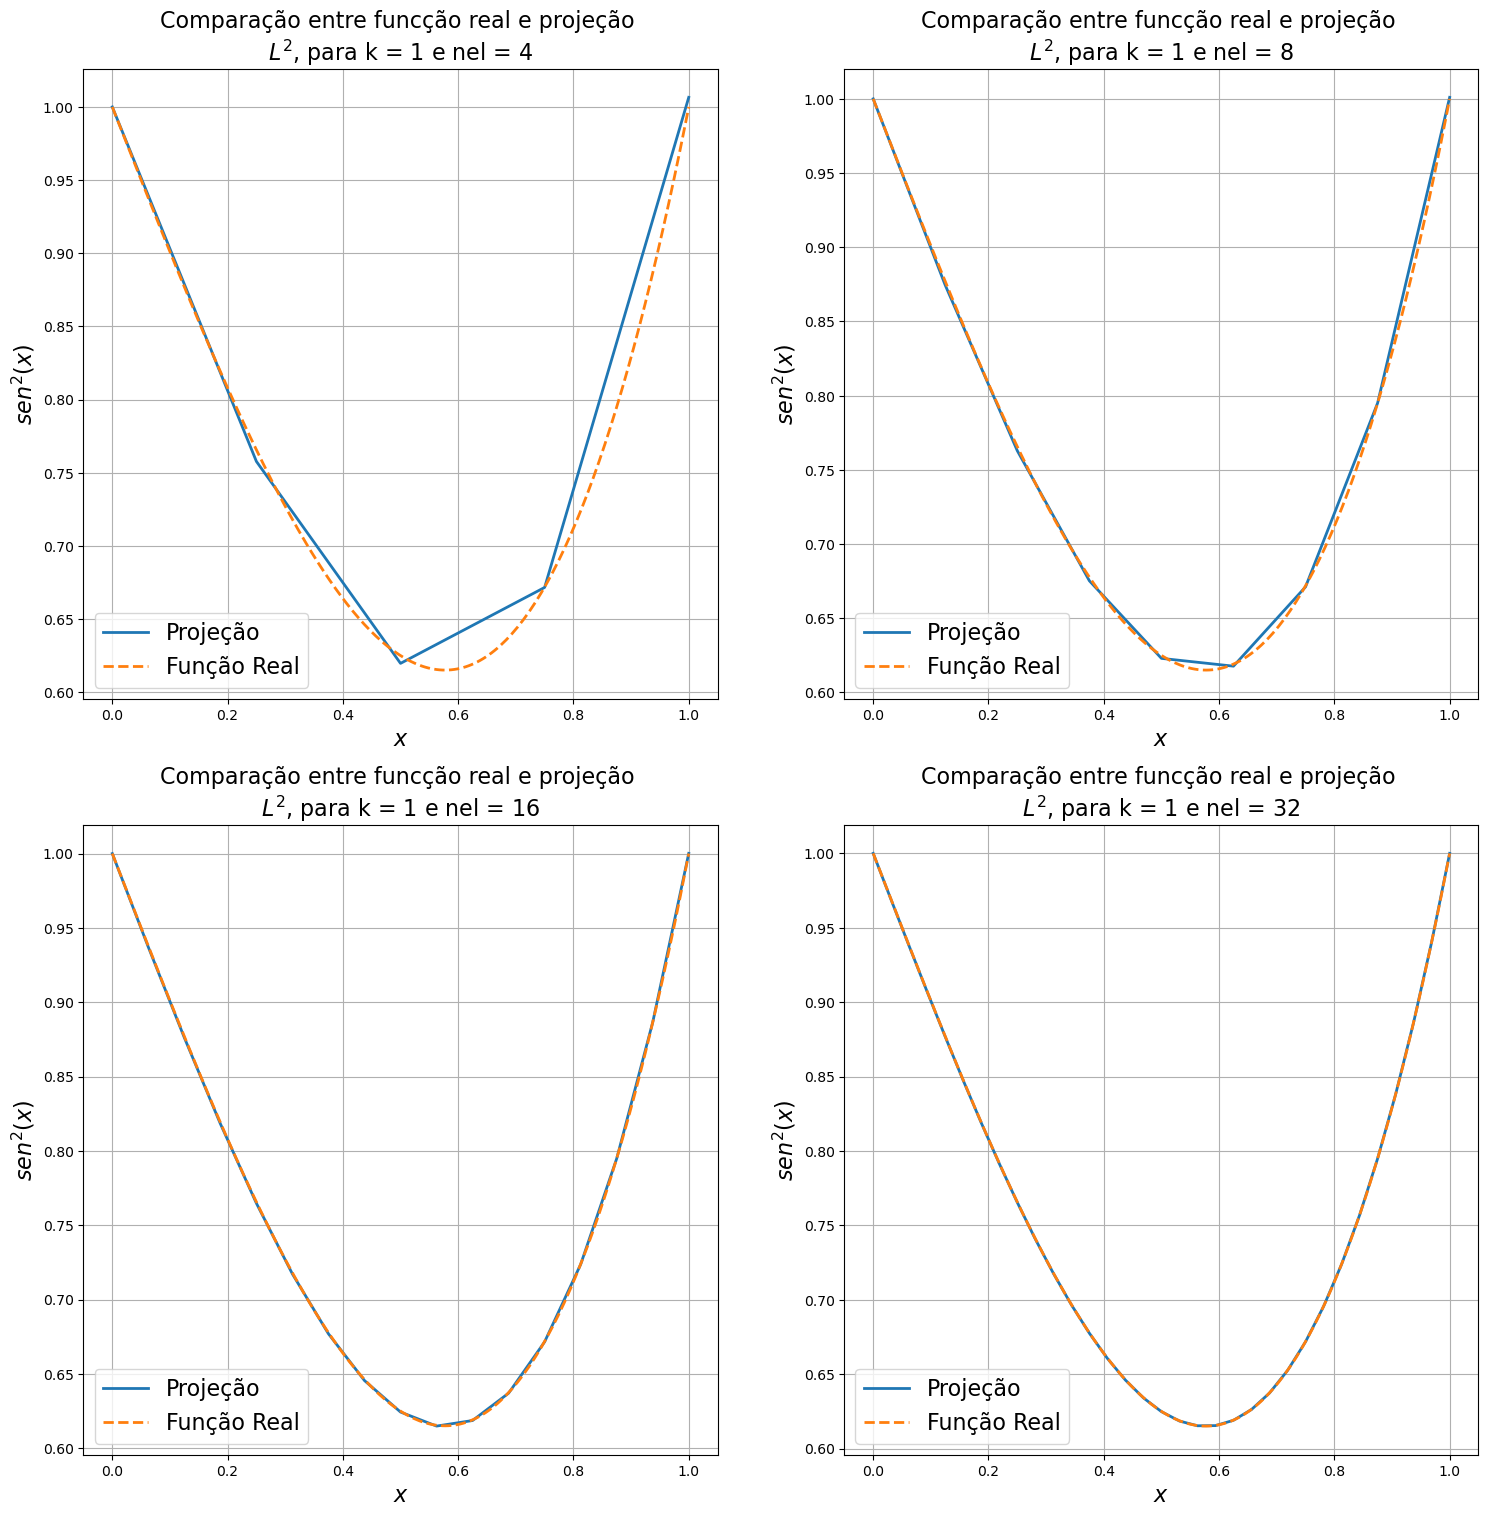

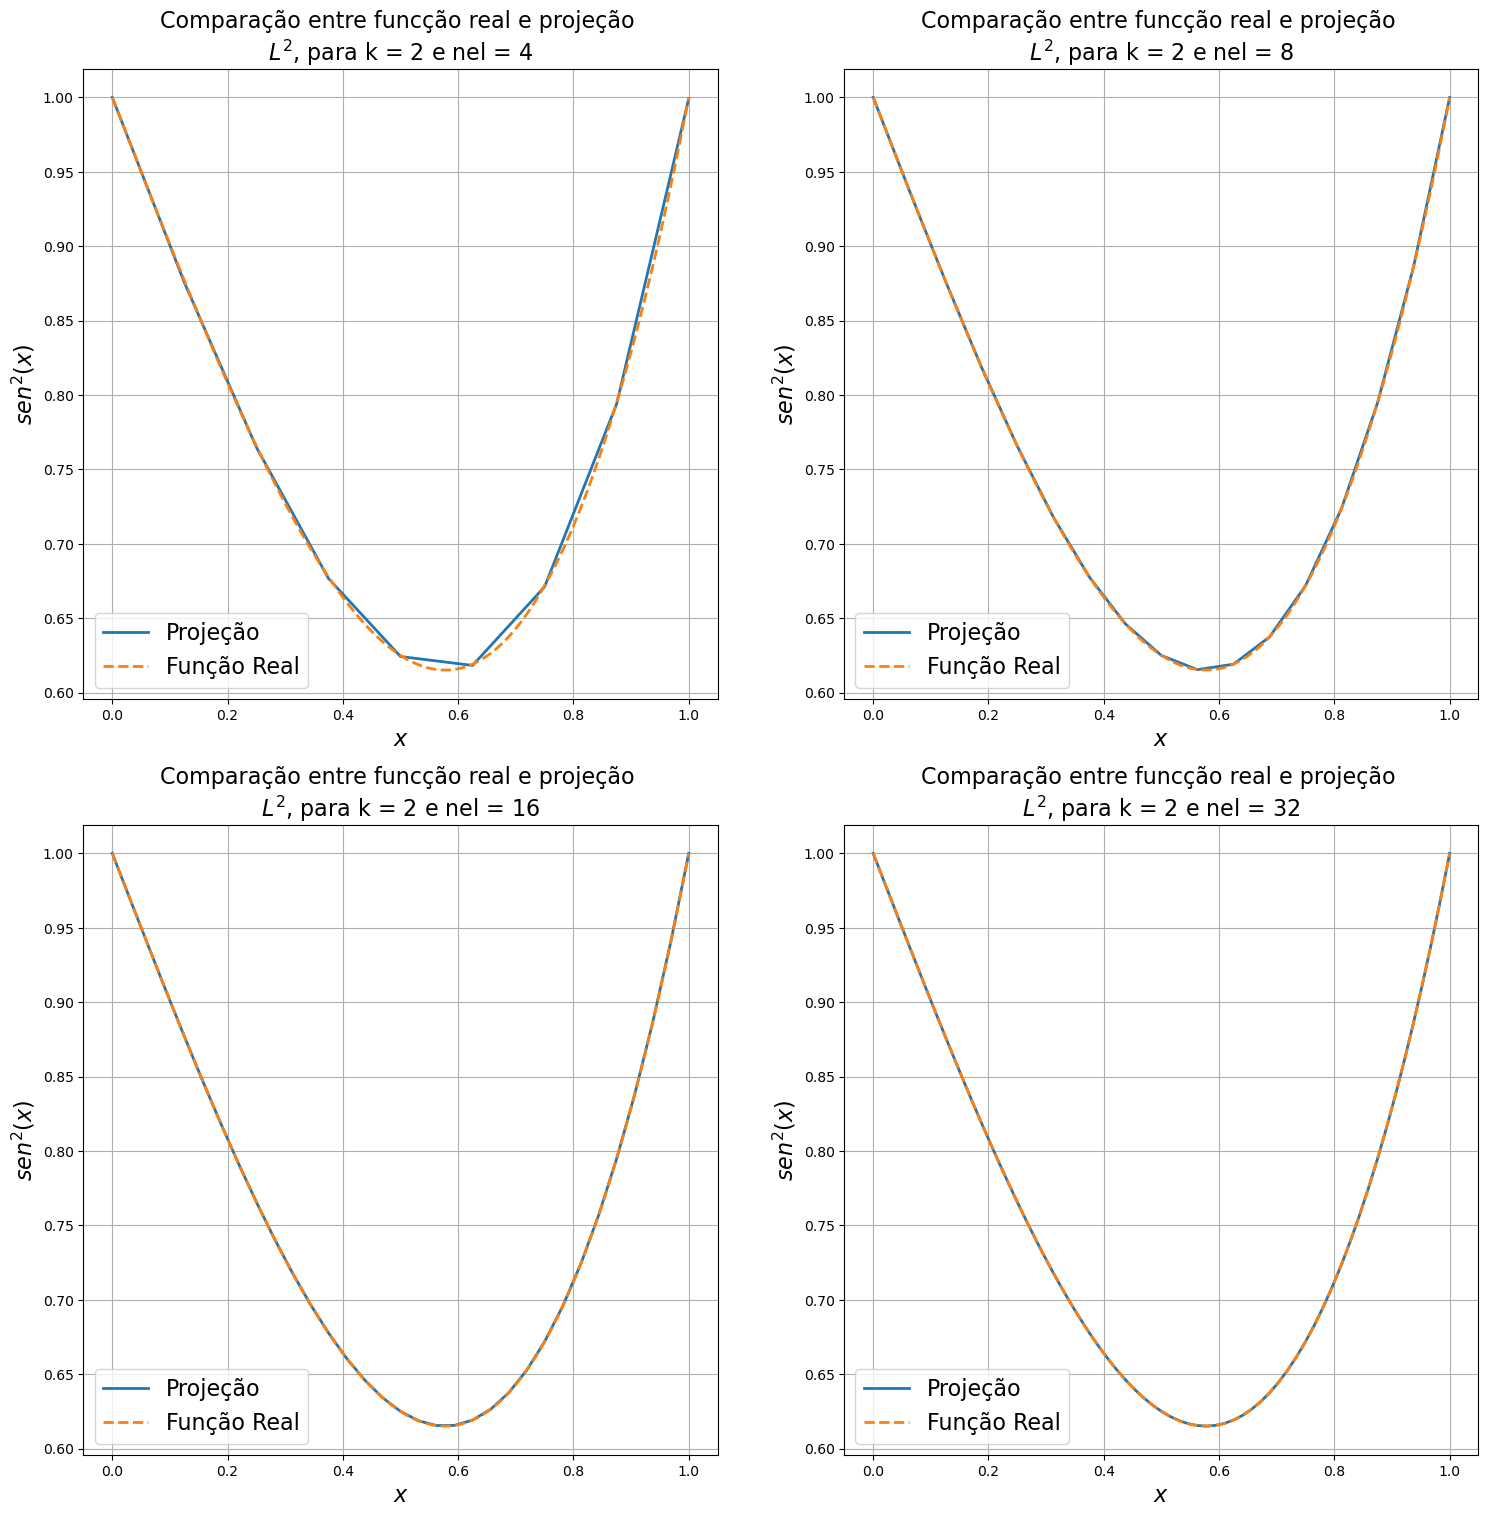

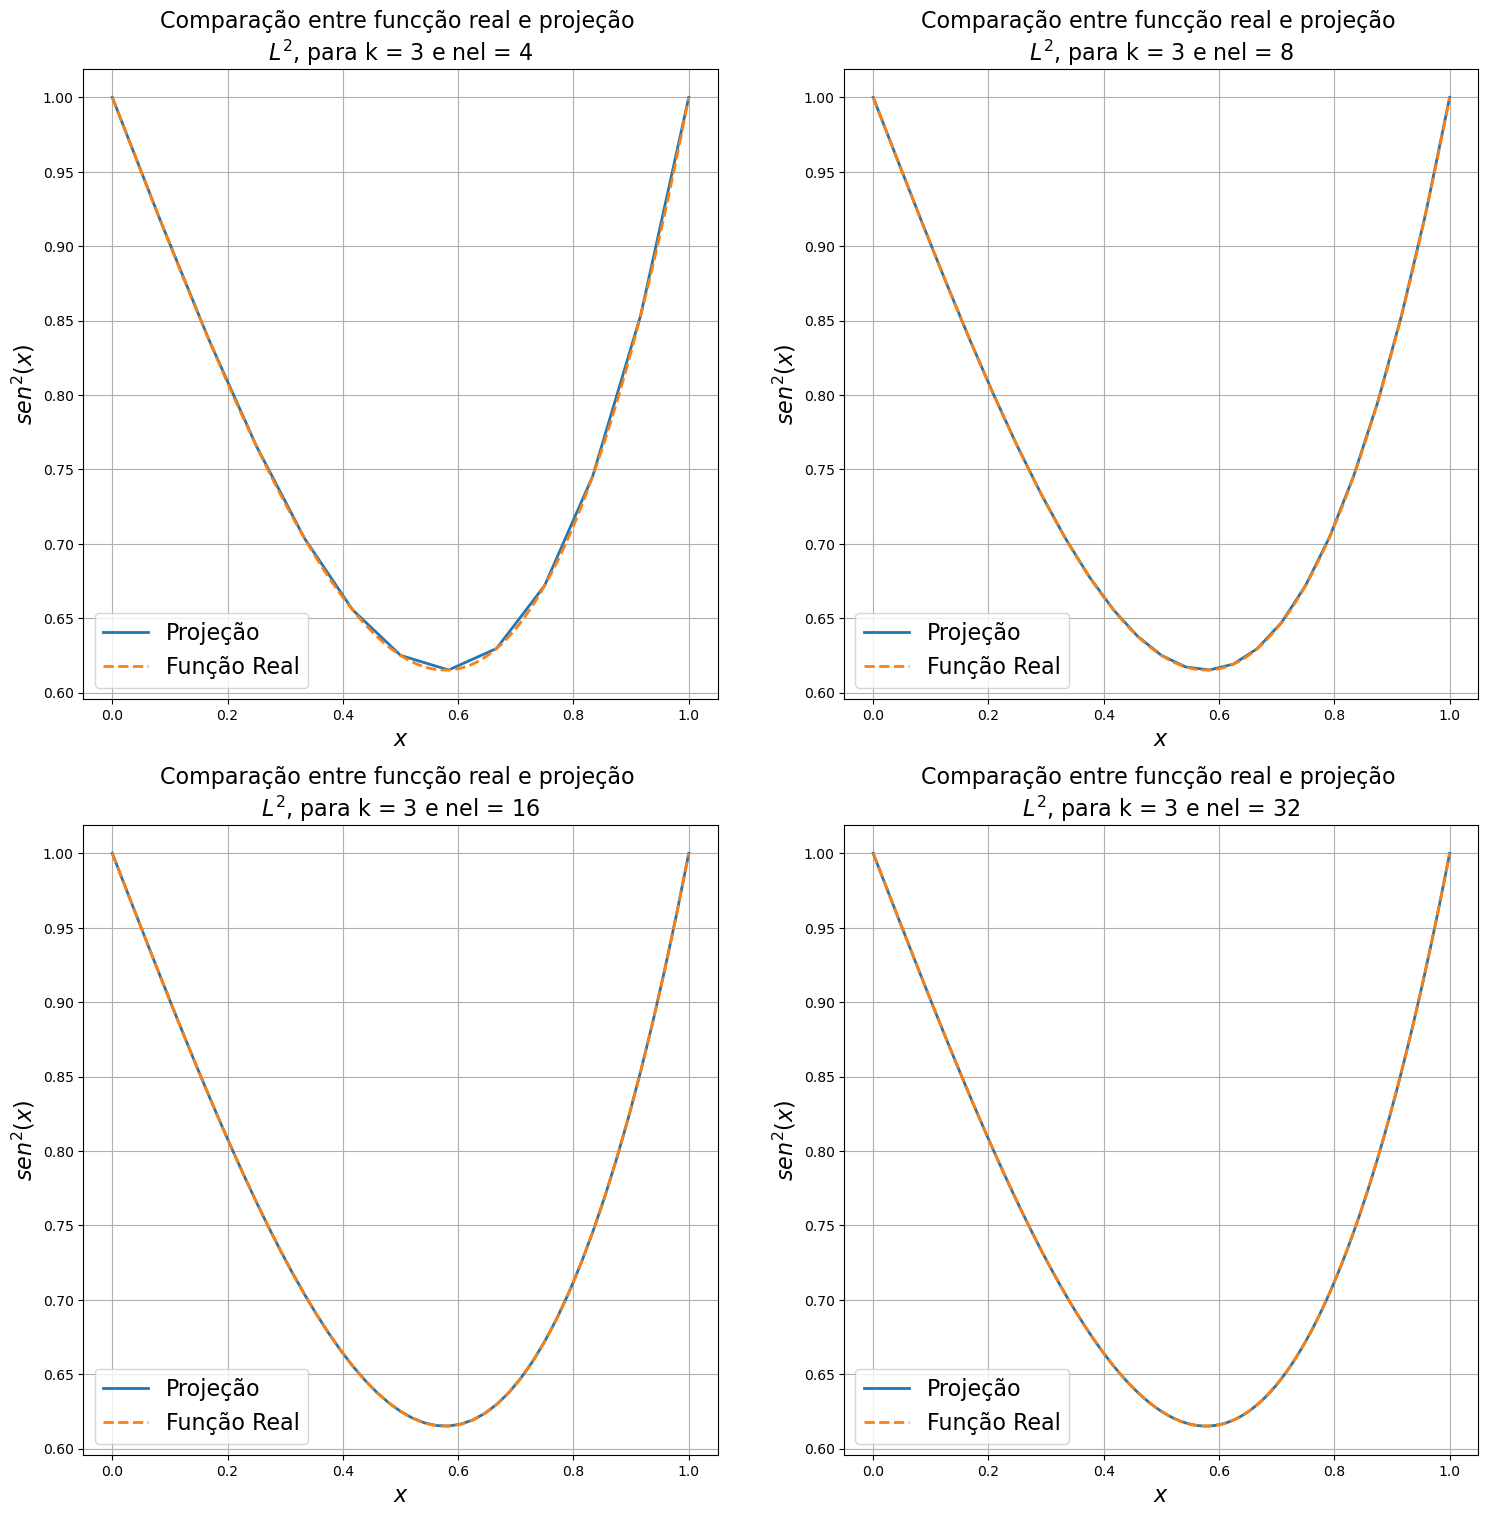

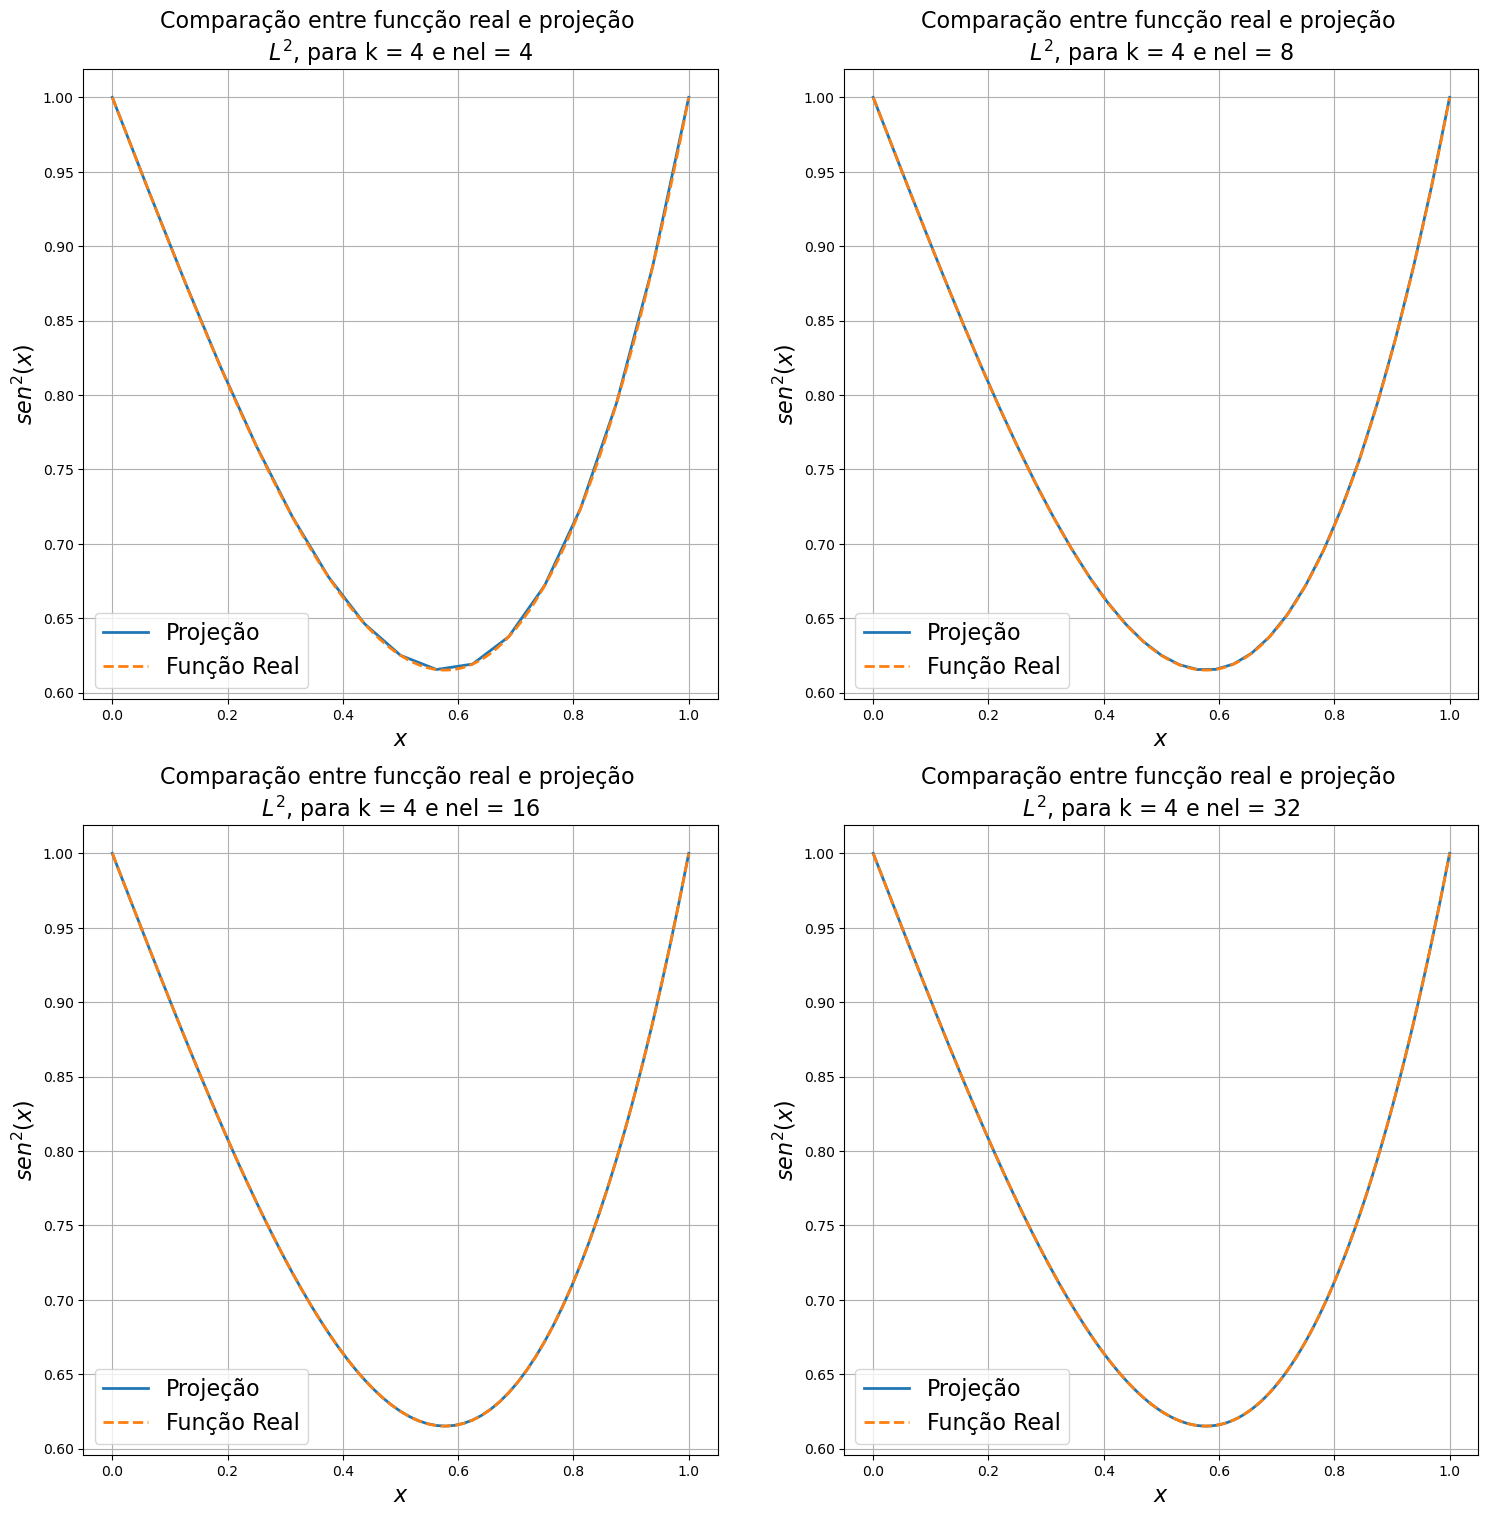

In [42]:
import matplotlib.pyplot as plt


f = lambda x: x**3 - x + 1


a = 0
b = 1

k_list = [1, 2, 3, 4]

nel_list = [2**2, 2**3, 2**4, 2**5]

size = 2

result_dict = {}

for k in k_list:
    plot_count = 1

    fig = plt.figure(figsize=[size * 9, size * 9])

    result_dict["base_" + str(k)] = {"erro": [], "erro_dif": [], "h": []}

    for nel in nel_list:
        # Realizando a Projeção

        h, xl, alpha, l_2_error, l_2_dif_error = FEM(
            a, b, nel, k, 10**6, 0, 1, 0, 0, -2
        )

        result_dict["base_" + str(k)]["erro"].append(l_2_error)
        result_dict["base_" + str(k)]["erro_dif"].append(l_2_dif_error)
        result_dict["base_" + str(k)]["h"].append(h)

        # Plotando resultados
        ax = fig.add_subplot(2, 2, plot_count)

        ax.set_title(
            "Comparação entre funcção real e projeção \n$L^2$, para k = {} e nel = {}".format(
                k, nel
            ),
            fontsize=16,
        )

        ax.set_ylabel("$sen^2(x)$", fontsize=16)
        ax.set_xlabel("$x$", fontsize=16)

        ax.plot(xl, alpha, linewidth=2, label="Projeção")

        # função real

        x_eval = np.linspace(a, b, num=200)

        ax.plot(x_eval, f(x_eval), linestyle="--", linewidth=2, label="Função Real")

        ax.legend(fontsize=16)

        ax.grid()

        plot_count += 1

    plt.show()
    fig.savefig("figures/real_vs_mef_k_{}_q2.png".format(k))

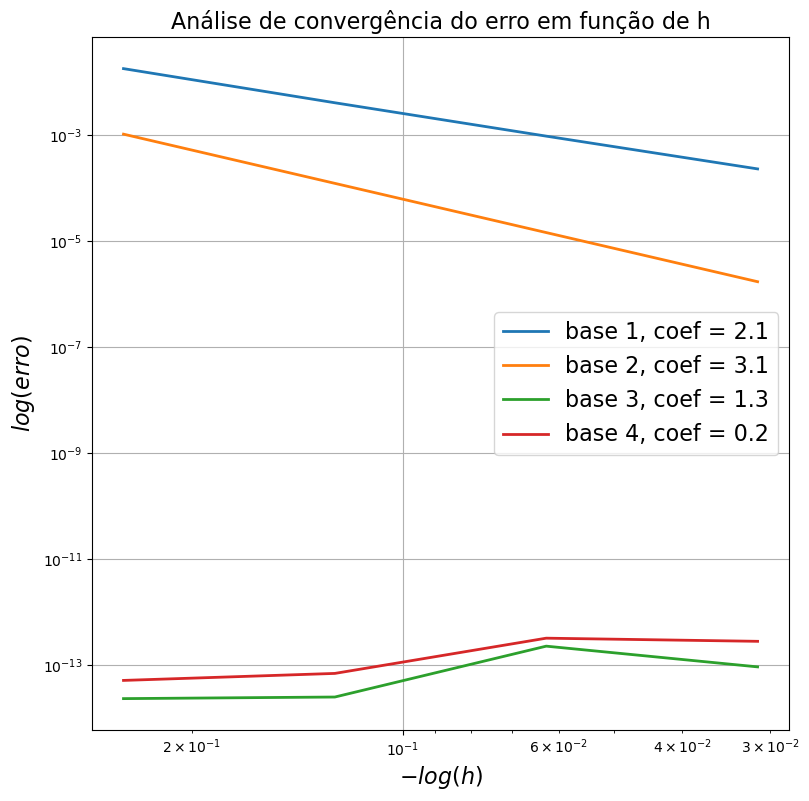

In [43]:
fig = plt.figure(figsize=[9, 9])

# Plotando resultados
ax = fig.add_subplot(1, 1, 1)

ax.set_title(
    "Análise de convergência do erro em função de h".format(k, nel),
    fontsize=16,
)

for k in k_list:
    y1 = np.log10(result_dict["base_{:d}".format(k)]["erro"][-1])
    y2 = np.log10(result_dict["base_{:d}".format(k)]["erro"][-2])

    x1 = np.log10(result_dict["base_{:d}".format(k)]["h"][-1])
    x2 = np.log10(result_dict["base_{:d}".format(k)]["h"][-2])

    coef = (y1-y2) / (x1-x2)

    ax.plot(
        result_dict["base_{:d}".format(k)]["h"],
        result_dict["base_{:d}".format(k)]["erro"],
        linewidth=2,
        label="base {}, coef = {:.1f}".format(k,coef)
    )

ax.set_ylabel("$log(erro)$", fontsize=16)
ax.set_xlabel("$-log(h)$", fontsize=16)
ax.invert_xaxis()
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=10)
ax.grid()
ax.legend(fontsize=16)
fig.savefig("figures/analise_de_conv_q1.png")

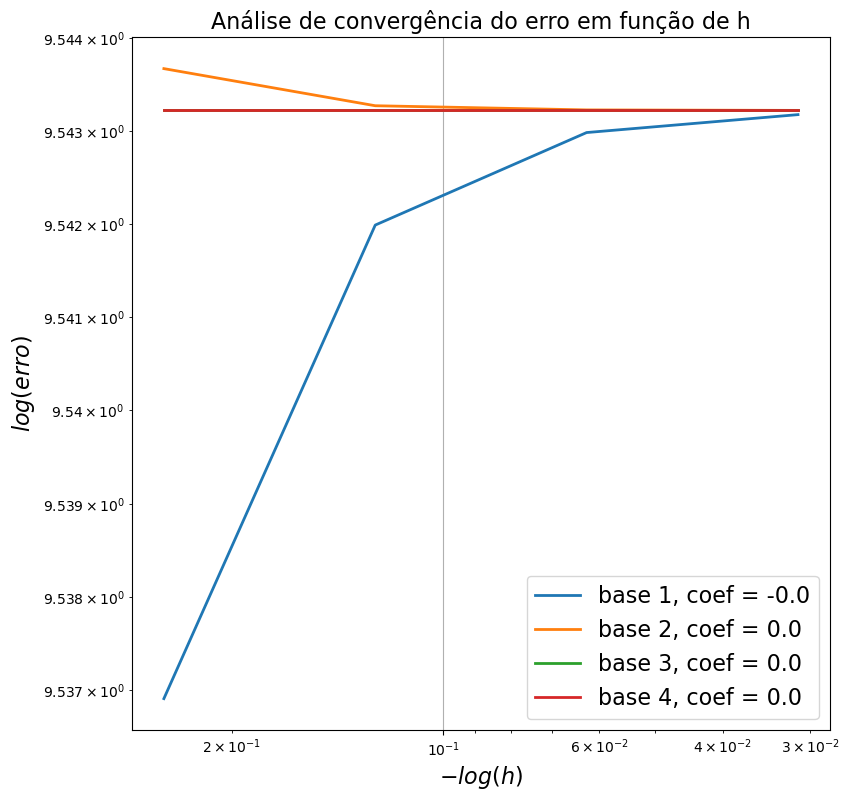

In [44]:
fig = plt.figure(figsize=[9, 9])

# Plotando resultados
ax = fig.add_subplot(1, 1, 1)

ax.set_title(
    "Análise de convergência do erro em função de h".format(k, nel),
    fontsize=16,
)

for k in k_list:
    y1 = np.log10(result_dict["base_{:d}".format(k)]["erro_dif"][-1])
    y2 = np.log10(result_dict["base_{:d}".format(k)]["erro_dif"][-2])

    x1 = np.log10(result_dict["base_{:d}".format(k)]["h"][-1])
    x2 = np.log10(result_dict["base_{:d}".format(k)]["h"][-2])

    coef = (y1-y2) / (x1-x2)

    ax.plot(
        result_dict["base_{:d}".format(k)]["h"],
        result_dict["base_{:d}".format(k)]["erro_dif"],
        linewidth=2,
        label="base {}, coef = {:.1f}".format(k,coef)
    )

ax.set_ylabel("$log(erro)$", fontsize=16)
ax.set_xlabel("$-log(h)$", fontsize=16)
ax.invert_xaxis()
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=10)
ax.grid()
ax.legend(fontsize=16)
fig.savefig("figures/analise_de_conv_dif_q2.png")